# Homework 3: Unsupervised Learning

# Part 1: Classification with K-means algorithm

The K-means algorithm is a fundamental tool among the unsupervised learning model. Consider a problem with a dataset $\mathcal{D} = \left\{x_i\right\}_{i=1}^n$ where $x_i \in \mathbb{R}^d$ with no labels, we are aiming at finding some hidden structure within the data, namely, we would like to find clusters in the dataset. Classifier has been studied in TP but mainly for supervised learning, here the data are not labelled. 

The K-means algorithm tries to classify the dataset in $K$ clusters. Each cluster is represented by a centroid, meaning the average of the points within the cluster. We note $C_k$ the set of points of a cluster $k$ and $\mu_k$ its centroid. Then, the algorithm minimizes the intra-cluster variance, in other words, it tries to reduce the distance between the points of the cluster and the centroid. 

More technically, the algorithm works iteratively in two main steps: 
 - Points are assigned to clusters based on their proximity to existing centroid
 - Centroids are updated by taking the average of the points assigned to each cluster.



The Loss function of the problem can be written as:
$$J(\mu_1, ..., \mu_K) = \sum_{i=1}^{n} \, \lVert x_i - \mu(i)\rVert^2 \; ,$$
where $\mu(i)$ is the centroid of the cluster assignated to $x_i$. 

We are aiming it at checking the understanding the choice of this loss function, does it match the rules aforementionned? Then, could it help to understand if the algorithm converges?

Additionnally, until Question 8, we assume that the clusters $C_k$ are disjoint, especially at the initialisation. 

#### Question 1:

In a first time, let us familiarize with the loss function:

 - Prove the second equality:

   $$J(\mu_1, ..., \mu_K) = \sum_{i=1}^{n} \, \lVert x_i - \mu(i)\rVert^2 = \sum_{k=1}^{K} \sum_{x_i \in C_k} \, \lVert x_i - \mu_k \rVert^2$$

 - What does the term $\sum_{x_i \in C_k} \, \lVert x_i - \mu_k \rVert^2$ represent?
 
 - Explain why this form of the loss function is more convenient.


We start by expanding the sum:
$$
J(\mu_1, ..., \mu_K) = \sum_{i=1}^{n} \, \lVert x_i - \mu(i)\rVert^2 = \lVert x_1 - \mu(1)\rVert^2 + \lVert x_2 - \mu(2)\rVert^2 + \, ... \, + \lVert x_n - \mu(n)\rVert^2
$$

As one element $x_{i}$ can belong to only one class, using the commutativity property, we can think of grouping together the terms that belong to same cluster and the summation becomes:
$$
J(\mu_1, ..., \mu_K) = \sum_{x_i \in C_1} \, \lVert x_i - \mu_1\rVert^2 + \sum_{x_i \in C_2} \, \lVert x_i - \mu_2\rVert^2 + \, ... \, + \sum_{x_k \in C_k} \, \lVert x_i - \mu_k\rVert^2 
$$
As we have $k$ clusters, the expression above is a sum of $k$ summations, thus:
$$
J(\mu_1, ..., \mu_K) = \sum_{k=1}^{K} \sum_{x_i \in C_k} \, \lVert x_i - \mu_k \rVert^2
$$
and the equivalence is proved.

$\sum_{x_i \in C_k} \, \lVert x_i - \mu_k \rVert^2$ represents the sum of the euclidean distances squared of every point $x_i$ belonging to a cluster $k$.

This form of the loss function is convenient because it allows to have a clear separation of the clusters. Especially, it is useful when we need to compute the centroids $\{\mu_k\}_{k=1}^{K}$ that minimize the loss function.

#### Question 2:

Let us focus on the first point of the algorihtm, let us consider a single point $x_i$ and add the time dependency. Also, we denote by a $'$ the variables after the new assignement of the data points. 

So that, the variables are denoted by: $(\cdot)^t \to (\cdot)^t\,{}' \to (\cdot)^{t+1} \to (\cdot)^{t+1}\,{}' \to (\cdot)^{t+2}$


Thus, at each step time $t$, the new assignements of the variables leads to: (no proof required)

$$ \mu^t(i)' = {\rm argmin}_{\mu \in \left\{\mu^t_k\right\}_k} \lVert x_i - \mu \rVert^2$$

For instance, at time $t$ before new assignements, the vector $x_i$ belongs to a cluster $k$, while after the next assignement, it now belongs to the cluster $k'$ (it can be the same or different from the cluster $k$). 


Thus, for the whole dataset, the algorithm updates the assignement as: $\left\{\mu^t(i) \right\} \to \left\{\mu^t(i)'\right\}$.


Compare $\lVert x_i - \mu^t(i) \rVert^2$ and $\lVert x_i - \mu^t(i)' \rVert^2$ for a given point. 

$\mu^t(i)'$ is the centroid of the new cluster to which the point $x_i$ is assigned. It can be either the cluster to which $x_i$ already belong or a new one.

As it is the result of an $\argmin$ operation, it must the one that minimizes the squared of the euclidean distance. Thus, the comparison is:
$$
\lVert x_i - \mu^t(i)' \rVert^2 \leq \lVert x_i - \mu^t(i) \rVert^2
$$
with equality when $\mu^t(i)' = \mu^t(i)$

#### Question 3:

We recall that we denote by a $'$ the variables after the new assignement of the data points, so that: $\mu^t(i) \to \mu^t(i)'$ and $J_t \to J_t'$

Thanks to the previous question, compare $J_t$ and ${J_t}'$. 

Hint: Pick the right formula between the two given for $J$

$$
J_t = \sum_{i=1}^{n} \, \lVert x_i - \mu^t(i)\rVert^2
$$
$$
{J_t}' = \sum_{i=1}^{n} \, \lVert x_i - \mu^t(i)'\rVert^2
$$

As it holds $\lVert x_i - \mu^t(i)' \rVert^2 \leq \lVert x_i - \mu^t(i) \rVert^2 \; \forall i = 1, \, ..., \, n $ the we have:

$$
{J_t}' \leq J_t
$$

So the reassignement reduces the loss function.

#### Question 4:

Then, we can go ahead by studying the second point of the algorithm. It wants to minimize the intra-cluster variance:

$$ \left\{\mu^{t+1}_k\right\}_k = {\rm argmin}_{\left\{\mu_k\right\}_k \in \mathbb{R}^d} J'_t\left( \left\{\mu_k\right\}_k \right) = {\rm argmin}_{\left\{\mu_k\right\}_k \in \mathbb{R}^d} \sum_{k=1}^{K} \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k \rVert^2 $$


Show that the optimization can be done cluster-wise:

$$\mu^{t+1}_k = {\rm argmin}_{\mu_k \in \mathbb{R}^d}  \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k \rVert^2 $$

Let's start from the loss function $J'_t = \sum_{k=1}^{K} \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k \rVert^2$

We can define the function $d_k(\mu_k) = \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k \rVert^2 \;\;\; d_k(\mu_k): \mathbb{R}^d \rightarrow \mathbb{R}$

In the most general case, for a function it holds the following:
$$
inf\left(\sum_{k=1}^{K} d_k(\mu_k) \right) \geq inf\left( d_1(\mu_1) \right) + inf\left( d_1(\mu_1) \right) + \, ... \, inf\left( d_K(\mu_K) \right)
$$
where $inf(\cdot)$ is the infimum.

As we assume a minimum of the function exists, then the infimum coincides with the minimum and the above disequation becomes

$$
min\left(\sum_{k=1}^{K} d_k(\mu_k) \right) \geq min\left( d_1(\mu_1) \right) + min\left( d_1(\mu_1) \right) + \, ... \, min\left( d_K(\mu_K) \right)
$$

Because of that, if we minimize the each cluster separately and then we add up the results together, we are sure we get a result that is at least ($\leq$) as good as the minimum of the complete loss function. 

Therefore, we can minimize each cluster separately and still be sure to get the optimum result.


#### Question 5

Show that the new centroids of time $t+1$ are computed according to the following equality:

$$ \mu_k^{t+1} = \frac{1}{|C^t_k{}'|}\sum_{x_i \in C^t_k{}'} x_i $$

Does it correspond to what you expected from the algorithm? 

To show that the centroid that minimizes the loss function for a specific cluster is $\frac{1}{|C^t_k{}'|}\sum_{x_i \in C^t_k{}'} x_i$ we can start by taking the derivative of $\sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k \rVert^2$ with respect to $\mu_k$.

For the $j$-th element of vector $\mu_k$, the derivative is:

$$
\frac{\partial}{\partial \mu_{k,j}} \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k \rVert^2 = \sum_{x_i \in C^t_k{}'} \frac{\partial}{\partial \mu_{k,j}} \lVert x_i - \mu_k \rVert^2 = \sum_{x_i \in C^t_k{}'} -2(x_{i,j} - \mu_{k,j})
$$

Thus, in vector notation:
$$
\frac{\partial}{\partial \mu_{k}} \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k \rVert^2 = \sum_{x_i \in C^t_k{}'} -2(x_{i} - \mu_{k})
$$

To find the value of $\mu_k$ that minimizes the function, we set its derivative to 0 and solve for $\mu_k$. First rewrite the derivative as:
$$
-2\sum_{x_i \in C^t_k{}'} (x_{i} - \mu_{k}) \, = \, -2 \left (\sum_{x_i \in C^t_k{}'} x_{i} - \sum_{x_i \in C^t_k{}'} \mu_{k}  \right) = -2 \left (\sum_{x_i \in C^t_k{}'} x_{i} - |C^t_k{}'| \mu_{k}  \right) = 0
$$
Now solve for $\mu_k$
$$
\mu_k = \frac{1}{|C^t_k{}'|} \sum_{x_i \in C^t_k{}'} x_{i}
$$
$|C^t_k{}'|$ is the cardinality of the cluster $C_k$ thus $\mu_k^{t+1}$ is the average of all the points $x_i$ that have been assigned to the the cluster $k$.

That is exactly what we expected, given what was said in the introduction to the problem.

#### Question 6:

If we focus on a cluster $k$ at time $t$ after the assignement, noted $C^t_k {}'$, could you compare $\sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^t \rVert^2$ and $\sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^{t+1} \rVert^2$ ?

What can you say about ${J_t}'$ and $J_{t+1}$ ? Hint: Use the right formula between the two given for $J$.

$\mu^{t+1}_k$ is computed with an $\argmin$ operation and thus:

$$
\sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^{t+1} \rVert^2 = min_{\mu^t_k} \left( \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^t \rVert^2 \right)
$$

So, it will always be:
$$
\sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^{t+1} \rVert^2 \leq \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^t \rVert^2 
$$
with equality when $\mu_k^{t+1} = \mu_k^t $

To compare ${J_t}'$ and $J_{t+1}$ we need to recall that the complete loss functions are
- ${J_t}' = \sum_{k=1}^{K}  \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^t \rVert^2$
- $J_{t+1} = \sum_{k=1}^{K} \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^{t+1} \rVert^2$

Then we rewrite $J_{t+1}$ as:
$$
J_{t+1} = \sum_{k=1}^{K} min_{\mu^t_k} \left( \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^t \rVert^2 \right)
$$

Because of the property stated in Question 4, we can write:
$$
\sum_{k=1}^{K} min_{\mu^t_k} \left( \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^t \rVert^2 \right) \leq min_{\{\mu^t_k\}_k} \left( \sum_{k=1}^{K} \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^t \rVert^2 \right) \leq \sum_{k=1}^{K}  \sum_{x_i \in C^t_k{}'} \, \lVert x_i - \mu_k^t \rVert^2
$$

And so

$$
J_{t+1} \leq {J_t}'
$$

#### Question 7:

Putting together the Questions 3 and 5, compare $J_t$ and $J_{t+1}$

If we put together the results obtained we have
$$
J_{t+1} \leq {J_t}' \leq J_t
$$
And so
$$
J_{t+1} \leq J_t
$$

#### Question 8:

After recalling a trivial lower bound for the sequence $(J_t)_{t \geq 0}$, what can you say about the convergence?

The trivial lower bound for the loss function is
$$
J_t \geq 0 \;\;\; \forall t \geq 0
$$

Given the conditions for equality that have been highlighted in the previous questions, we can state that convergence occurs when the updated quantities are equal to the quantities before updating, that is, the update does not lead to any improvement. 

That means we have converged to the minimum of the loss the function.

So the condition for convergence is:
$$
J_{t+1} = J_t
$$

#### Question 9:

We just proved that the algorithm converges, but what about its stability:

Let us supposed that the data are sampled from a mixture of $K$ Gaussian, where the choice of $K$ is free for this question. Do you imagine a situation where the algorithm does not classify the data at all? Please design and explain the situation as clear as possible.

Using k-means we may encounter several problems regarding K gaussian distributions:
- High overlap between Gaussian components: The means of the Gaussians are very close to each other, or the variances are large, causing the distributions to overlap significantly.
- Similar weights: The mixing weights of the Gaussians are roughly equal or very similar, making it difficult to differentiate between the different components based solely on the data.

In the following code, I show an example of two mixture gaussians. As you can see, the weights are similar, the variance of the second is large and the means are close.

In the example provided the samples of the red distribution on the left of the line will be classified in be blue cluster, and the samples of the blue distribution on the right of the line will be classified in the red cluster.

This situation is un example that triggers the instability of k-means algorithm.

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [5]:
def sample_x_c(pi_vector, mean_vector, covariance_vector, n_samples):
    
    # Sample classes ck
    classes = np.array([0,1])
    ck_samples = np.random.choice(classes, size=n_samples, p=pi_vector)
    
    # Sample x given the classes
    x_samples = list()
    for ck in ck_samples:
          x_samples.append(multivariate_normal.rvs(mean_vector[ck], covariance_vector[ck], size=1))
          
    return np.array(x_samples), ck_samples

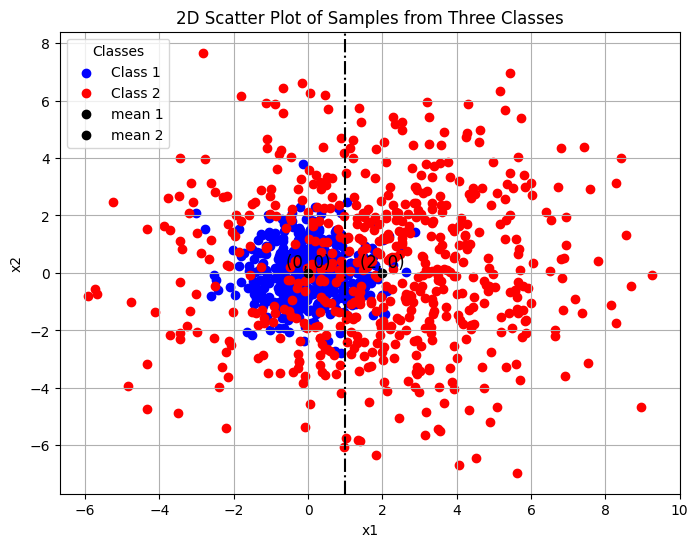

In [19]:
pi_vector = np.array([0.4, 0.6])
mean_vector = np.array([np.array([0, 0]), np.array([2, 0])])
covariance_vector = np.array([np.eye(2), 7*np.eye(2)])
n_samples = 1000

X, c = sample_x_c(pi_vector, mean_vector, covariance_vector, n_samples)

plt.figure(figsize=(8, 6))
colors = {0: 'blue', 1: 'red', 2: 'yellow'}
for ck in np.unique(c):
    plt.scatter(X[c == ck, 0], X[c == ck, 1], 
                color=colors[ck], label=f'Class {ck+1}')
plt.scatter(0, 0, color='black', label='mean 1')
plt.text(0, 0 + 0.2, f"({0}, {0})", fontsize=12, ha='center', color='black')
plt.scatter(2, 0, color='black', label='mean 2')
plt.text(2, 0 + 0.2, f"({2}, {0})", fontsize=12, ha='center', color='black')
plt.axvline(1, color='black', linestyle='-.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Scatter Plot of Samples from Three Classes')
plt.legend(title="Classes")
plt.grid()
plt.show()

In case of highly overlapping datasets, points of one dataset may be closer to the centroid of another cluster.

#### Question 10:

What can you say about those configurations of centroids? What does it imply concerning the minima? Conclude your arguments by discussing the convexity of the problem. 

We can analyze the convexity of the loss function to see if this algorithm can lead to an optimum configuration of the centroids.

Recall that a function is convex if it is twice differentiable and its second derivative is greater or equal than 0.

Thus, we compute the second derivative of the loss function with respect to the centroids $\mu_k$, in formulae:
$$
\frac{\partial^2}{\partial \{ \mu_k \}_k^2} J(\{ \mu_k\}_k) = \frac{\partial^2}{\partial \{ \mu_k \}_k^2} \sum_{k=1}^K \sum_{x_i \in C_k{}} \, \lVert x_i - \mu_k \rVert^2 = \sum_{k=1}^K \frac{\partial^2}{\partial \mu_{k}^2} \sum_{x_i \in C_k{}} \, \lVert x_i - \mu_k \rVert^2
$$

As shown in question 5:
$$
\frac{\partial}{\partial \mu_{k}} \sum_{x_i \in C_k{}} \, \lVert x_i - \mu_k \rVert^2 = \sum_{x_i \in C_k{}} -2(x_{i} - \mu_{k})
$$
And so:
$$
\frac{\partial^2}{\partial \mu_{k}^2} \sum_{x_i \in C_k{}} \, \lVert x_i - \mu_k \rVert^2 = \sum_{x_i \in C_k{}} 2 = 2\,\lvert C_k \rvert
$$
Therefore 
$$
\frac{\partial^2}{\partial \{ \mu_k \}_k^2} J(\{ \mu_k\}_k) = \sum_{k=1}^K 2\,\lvert C_k \rvert \geq 0
$$

In general, the second derivative of the loss function with respect to all the centroids is greater or equal than zero, so it is convex.

If we assume that at least one cluster has non-zero cardinality (that looking at the problem is a reasonable assumption), then the second derivative becomes strictly greater than zero and the function is strictly convex.

The convexity of the loss function suggests that the centroids optained at the convergence of the algorithm are indeed the best configuration of centroids.

#### Question 11:

We can also generalize quickly our algorithm

In some situation you are aiming at favorizing some diretions in your data and penalysing the others, so that you can weight the euclidian distance according to:

$$d^{(w)}(x_{i}, \mu(i)) = \frac{\sum_{j=1}^d w_i(x_{ij} - \mu(i)_j)^2}{\sum_{j=1}^d w_j} $$

Show that with a change of variables, the problem remains the same.


We can rewrite the function in the following way:
$$
d^{(w)}(x_{i}, \mu(i)) = \frac{\sum_{j=1}^d w_i(x_{ij} - \mu(i)_j)^2}{\sum_{j=1}^d w_j} =  \frac{\sum_{j=1}^d (\sqrt{w_i}x_{ij} - \sqrt{w_i}\mu(i)_j)^2}{\sum_{j=1}^d w_j}
$$

Then we can define:
- $x_ij' = \sqrt{w_i}x_{ij}$
- $\mu(i)_j' =  \sqrt{w_i}\mu(i)_j$

And thus the euclidean distance becomes:
$$
d^{(w)}(x_{i}, \mu(i)) = \frac{\sum_{j=1}^d (x_{ij}' - \mu(i)'_j)^2}{\sum_{j=1}^d w_j}
$$

The loss function then becomes:
$$
J(\mu_1', ..., \mu_K') = \frac{\sum_{i=1}^n \lVert x_i' - \mu(i)' \rVert^2}{\sum_{j=1}^d w_j}
$$

The minimization problem is not affected by the constant denominator $\sum_{j=1}^d w_j$ and so we get:
$$
J(\mu_1', ..., \mu_K') = \sum_{i=1}^n \lVert x_i' - \mu(i)' \rVert^2
$$

That is equivalent to the initial loss function without the weights, and so the problem is the same.

# Part 2: Restricted Boltzmann Machine




### Introduction

The Boltzmann Machine have been inspired by thermodynamic and statistical physics models, more precisely they are part of the Energy Models using the well known Boltzmann Distribution as written in physics style:

$$ P\left( E \right)  = \frac{1}{Z} \exp \left( -\frac{E}{k_b T} \right)$$

It becomes in statistical inference framework:
$$
P(\mathbf{v} | J, \mathbf{b}) \propto e^{\mathbf{v}^TJ\mathbf{v} + \mathbf{b}^T\mathbf{v}} = e^{-E(\mathbf{v})}
$$
where:
- $\mathbf{v}\in\mathbb{R}^n:$ The binary vector with components $v_i = 0 \; {\rm or} \; 1$

- $J \in \mathbb{R}^{n \times n}:$ The coupling matrix

- $\mathbf{b} \in  \mathbb{R}^n$: Field

- $E(\mathbf{v}) \in  \mathbb{R}$: Energy


However, one problem arised with initial Boltzmann Machine (BM) -- like its parent models in statistical physics (as the SK model) -- all the units are interacting through complicated dependencies. For example, if we consider 3 components of $\mathbf{v}$: $v_1$, $v_2$, and $v_3$, there are trivial interactions such as one modelised by $P(v_1, v_2)$ corresponding to the correlation between the two first components of $\mathbf{v}$, but there are also none trivial interactions. Indeed, if some term like $P(v_1, v_2 | v_3)$ which suggests that the correlation $x_1$ and $v_2$ depends on $v_3$ and this is clearly none linear.

A really ingenious way to overcome this situation is to replace all the tricky interactions between the units $\mathbf{v}\in\mathbb{R}^n$ by connections through hidden units $\mathbf{h}\in\mathbb{R}^m$, artifically created. Indeed, correlations between two units $v_1$ and $v_2$ (specially the dependency of their correlations on other units $v_3$, $v_4$,...) can be atrificially replaced by introducing a third unit $h_1$ and considerin only linear correlations between $v_1 \leftrightarrow h_1$, $h_1 \leftrightarrow v_2$ and $v_1 \leftrightarrow v_2$. The units $v_i$ are now called the visible units. This model is the most known version of BMs. 

<div style="text-align: center;">
    <img src="boltzmannmachine.png" alt="Diagram here" />
</div>


However, this model is still fully connected and makes the computation really costful. Then, one can even simplify the model by considering zero intra layer interractions. This simplified model is call Restricted Boltzmann Machine (RBM) (Physics Nobel Price 2024 🥳).

Thus, the RBM architecture consists of two layers of binary stochastic units: a $\textbf{visible layer}$ $\mathbf{v}$ and a $\textbf{hidden layer}$ $\mathbf{h}$. The layers are fully connected, but there are no connections within a layer, making the model a $\textbf{bipartite graph}$. 

<div style="text-align: center;">
    <img src="rbm.png" alt="Diagram here" />
</div>

Restricted Boltzmann Machines (RBMs) are a class of energy-based probabilistic graphical models that are commonly used in machine learning for tasks such as dimensionality reduction, feature learning, and generative modeling.

### Energy Function and Probabilities

The joint configuration of the visible units $\mathbf{v} \in \{0, 1\}^d$ and the hidden units $\mathbf{h} \in \{0, 1\}^m$ is associated with an $\textbf{energy function}$, defined as:

$$ E(\mathbf{v}, \mathbf{h}) = -\mathbf{v}^\top \mathbf{W} \mathbf{h} - \mathbf{b}^\top \mathbf{v} - \mathbf{c}^\top \mathbf{h}$$
where:
- $\mathbf{W} \in \mathbb{R}^{d \times m}$ is the weight matrix connecting the visible and hidden units,
- $\mathbf{b} \in \mathbb{R}^d$ field of the visible units or also called the biases of the visible units,
- $\mathbf{c} \in \mathbb{R}^m$ field of the hidden units of also called the biases of the hidden units.

The energy function determines the joint probability distribution over $\mathbf{v}$ and $\mathbf{h}$:
$$ P(\mathbf{v}, \mathbf{h}) = \frac{1}{Z} \exp(-E(\mathbf{v}, \mathbf{h})) $$
where $Z$ is the $\textbf{partition function}$, ensuring normalization:

$$ Z = \sum_{\mathbf{v}, \mathbf{h}} \exp(-E(\mathbf{v}, \mathbf{h})) $$


The marginal probability of the visible units $\mathbf{v}$ is obtained by summing over all possible configurations of the hidden units:

$$ P(\mathbf{v}) = \frac{1}{Z} \sum_{\mathbf{h}} \exp(-E(\mathbf{v}, \mathbf{h})). $$

#### Question 12:

Write a valid expression of the energy $E(\textbf{v}, \textbf{h})$ in the case of a BM (non-restricted) with an hidden layer. 

As in the BM there are also connections within nodes of the visible layers and within nodes of the hidden layer the we can write the energy as:
$$
E(\textbf{v}, \textbf{h}) = -\mathbf{v}^\top \mathbf{J} \mathbf{v} -\mathbf{h}^\top \mathbf{K} \mathbf{h}  -\mathbf{v}^\top \mathbf{W} \mathbf{h} - \mathbf{b}^\top \mathbf{v} - \mathbf{c}^\top \mathbf{h}
$$

Where $\mathbf{K}$ is the coupling matrix of the hidden layer and $\mathbf{J}$ the one of visible layer.

### Conditional Independence

#### Question 13:

One of the key properties of RBMs is the $\textbf{conditional independence}$ between units within a layer:

Compute the conditional probability and show that:

$$ P(h_j = 1 | \mathbf{v}) = \sigma\left(c_j + \sum_{i} v_i W_{ij}\right) $$
and
$$ P(v_i = 1 | \mathbf{h}) = \sigma\left(b_i + \sum_{j} h_j W_{ij}\right) $$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$ is the sigmoid activation function.

This bipartite structure enables efficient Gibbs sampling for approximating the intractable joint distribution $P(\mathbf{v}, \mathbf{h})$.

Start from the distribution $P(\mathbf{v}, \mathbf{h})$.

With Bayes we can rewrite it as $P(\mathbf{v}, \mathbf{h}) = P(\mathbf{v})P(\mathbf{h} | \mathbf{v})$

Then, because of conditional independence the equation becomes:
$$
P(\mathbf{h}_j = 1 | \mathbf{v}) = \frac{P(\mathbf{v}, \mathbf{h}_j = 1)}{P(\mathbf{v})}
$$

As we are working just with $\mathbf{h}_j$ we write $P(\mathbf{v})$ as
$$
P(\mathbf{v}) = \frac{1}{Z} \sum_{\mathbf{h}_j \in \{0, 1\}} exp\left( -E(\mathbf{v}, \mathbf{h}_j\right)
$$
and $P(\mathbf{v}, \mathbf{h}_j = 1)$ as
$$
P(\mathbf{v}, \mathbf{h}_j = 1) = \frac{1}{Z}  exp\left( -E(\mathbf{v}, \mathbf{h}_j = 1\right)
$$
Therefore
$$
\frac{P(\mathbf{v}, \mathbf{h}_j = 1)}{P(\mathbf{v})} = \frac{\frac{1}{Z}  exp\left( -E(\mathbf{v}, \mathbf{h}_j = 1\right)}{\frac{1}{Z} \sum_{\mathbf{h}_j \in \{0, 1\}} exp\left( -E(\mathbf{v}, \mathbf{h}_j\right)} = \frac{exp\left( -E(\mathbf{v}, \mathbf{h}_j = 1\right)}{\sum_{\mathbf{h}_j \in \{0, 1\}} exp\left( -E(\mathbf{v}, \mathbf{h}_j\right)}
$$
For a single $\mathbf{h}_j$ the energy becomes:
$$
E(\mathbf{v}, \mathbf{h}_j) = -\mathbf{v}^\top \mathbf{W}_j \mathbf{h}_j - \mathbf{b}^\top \mathbf{v} - \mathbf{c}_j \mathbf{h}_j
$$
Where $\mathbf{W}_j$ is the j-th column of $\mathbf{W}$, i.e. the one multiplied by $\mathbf{h}_j$ and $\mathbf{c}_j$ is the j-th component of $\mathbf{c}$.
This can be rewritten in a scalar form:
$$
E(\mathbf{v}, \mathbf{h}_j) = -\mathbf{h}_j\sum_{i} \mathbf{v_{i}}\mathbf{W}_{ij} - \sum_{i}\mathbf{b}_i \mathbf{v}_i - \mathbf{c}_j \mathbf{h}_j
$$
And if we evalute for $\mathbf{h}_j = 1$ and $\mathbf{h}_j = 0$ we have
$$
E(\mathbf{v}, \mathbf{h}_j = 1) = -\sum_{i} \mathbf{v_{i}}\mathbf{W}_{ij} - \sum_{i}\mathbf{b}_i \mathbf{v}_i - \mathbf{c}_j
$$
$$
E(\mathbf{v}, \mathbf{h}_j = 0) =  - \sum_{i}\mathbf{b}_i \mathbf{v}_i
$$
If we plug this energy values in the equation above we have:
$$
\frac{P(\mathbf{v}, \mathbf{h}_j = 1)}{P(\mathbf{v})} = \frac{exp\left( -E(\mathbf{v}, \mathbf{h}_j = 1\right)}{ exp\left( -E(\mathbf{v}, \mathbf{h}_j = 0\right) + exp\left( -E(\mathbf{v}, \mathbf{h}_j = 1\right)} =
\\[5mm]
= \frac{exp \left( \sum_{i} \mathbf{v_{i}}\mathbf{W}_{ij} \right)\, exp\left( \sum_{i}\mathbf{b}_i \mathbf{v}_i \right) \, exp\left( \mathbf{c}_j \right)}{exp\left( \sum_{i}\mathbf{b}_i \mathbf{v}_i \right) + exp \left( \sum_{i} \mathbf{v_{i}}\mathbf{W}_{ij} \right)\, exp\left( \sum_{i}\mathbf{b}_i \mathbf{v}_i \right) \, exp\left( \mathbf{c}_j \right)} = 
\\[5mm]
= \frac{exp \left( \sum_{i} \mathbf{v_{i}}\mathbf{W}_{ij} \right)\, exp\left( \mathbf{c}_j \right)}{1 + exp \left( \sum_{i} \mathbf{v_{i}}\mathbf{W}_{ij} \right)\, exp\left( \mathbf{c}_j \right)} =
\\[5mm]
= \frac{exp \left( \sum_{i} \mathbf{v_{i}}\mathbf{W}_{ij} + \mathbf{c}_j \right)}{1 + exp \left( \sum_{i} \mathbf{v_{i}}\mathbf{W}_{ij} + \mathbf{c}_j \right)}
$$

That is the expression of the sigmoid function and thus we can write:
$$
P(h_j = 1 | \mathbf{v}) = \sigma\left(c_j + \sum_{i} v_i W_{ij}\right)
$$

For $P(v_i = 1 | \mathbf{h})$ the idea is the same, as well as the calculations.
The energy can be expressed as:
$$
E(\mathbf{v}_i = 1, \mathbf{h}_j) = -\sum_{j} \mathbf{h_{j}}\mathbf{W}_{ij} - \mathbf{b}_i - \sum_{j}\mathbf{c}_j \mathbf{h}_j
$$
$$
E(\mathbf{v}_i = 0, \mathbf{h}) =  - \sum_{j}\mathbf{c}_j \mathbf{h}_j
$$
And so the probablity becomes:
$$
\frac{P(\mathbf{v}_i = 1, \mathbf{h})}{P(\mathbf{h})} = \frac{exp\left( -E(\mathbf{v}_i = 1, \mathbf{h}\right)}{ exp\left( -E(\mathbf{v}_i = 0, \mathbf{h}\right) + exp\left( -E(\mathbf{v}_i = 1, \mathbf{h}\right)} = 
\\[5mm]
=  \frac{exp \left( \sum_{j} \mathbf{h}_j\mathbf{W}_{ij} \right)\, exp\left( \sum_{j}\mathbf{c}_j \mathbf{h}_j \right) \, exp\left( \mathbf{b}_i \right)}{exp\left( \sum_{j}\mathbf{c}_j \mathbf{h}_j \right) + exp \left( \sum_{j} \mathbf{h}_j\mathbf{W}_{ij} \right)\, exp\left( \sum_{j}\mathbf{c}_j \mathbf{h}_j \right) \, exp\left( \mathbf{b}_i \right)} = 
\\[5mm]
=  \frac{exp \left( \sum_{j} \mathbf{h}_j\mathbf{W}_{ij} \right)\,exp\left( \mathbf{b}_i \right)}{1 + exp \left( \sum_{j} \mathbf{h}_j\mathbf{W}_{ij} \right)\,  exp\left( \mathbf{b}_i \right)} =
\\[5mm]
=  \frac{exp \left( \sum_{j} \mathbf{h}_j\mathbf{W}_{ij} + \mathbf{b}_i \right)}{1 + exp \left( \sum_{j} \mathbf{h}_j\mathbf{W}_{ij} + \mathbf{b}_i \right)}
$$
Therfore
$$ P(v_i = 1 | \mathbf{h}) = \sigma\left(b_i + \sum_{j} h_j W_{ij}\right) $$

### Learning in RBMs

#### Question 14:

Training an RBM involves maximizing the likelihood of the data distribution. To do so we are aiming at using a gradient descent/ascent on the weights (and biases).

Compute the log-likelihood $\mathcal{L}(\mathbf{v})$, remember that the model is part of the unsupervised learning.

As in this case the dataset is only a single $\mathbf{v}$ then the log-likelihood is 
$$
\mathcal{L}(\mathbf{v}) = log\left( P(\mathbf{v}) \right)
$$
Which means that the best model will be the one where all the paraemeters (weights and biases) maximize the probability of getting the visible vector $\mathbf{v}$ out of the model.

#### Question 15:

Compute the gradient of the log-likelihood with respect to the weights $\mathbf{W}$ and the biases $\mathbf{b}$, $\mathbf{c}$ : 

The gradient of the log likelihood with respect to $\mathbf{W}$ is a matrix where each entry is the partial derivative of $\mathcal{L}(\mathbf{v})$ with respect to $\mathbf{W}_{ij}$.
Thus I compute:
$$
\frac{\partial}{\partial \mathbf{W}_{ij}} \mathcal{L}(\mathbf{v}) = \frac{\partial}{\partial \mathbf{W}_{ij}} log\left( P(\mathbf{v}) \right)
$$
$$
\frac{\partial}{\partial \mathbf{W}_{ij}} log\left( P(\mathbf{v}) \right) = \frac{\partial}{\partial \mathbf{W}_{ij}} log\left( \frac{1}{Z} \sum_{\mathbf{h}} exp\left( -E(\mathbf{v}, \mathbf{h}) \right) \right) = 
\\[5mm]
= \frac{\partial}{\partial \mathbf{W}_{ij}} log\left( \sum_{\mathbf{h}} exp\left( -E(\mathbf{v}, \mathbf{h}) \right)\right) - \frac{\partial}{\partial \mathbf{W}_{ij}} log \left( Z \right)
$$
First look at $\frac{\partial}{\partial \mathbf{W}_{ij}} log\left( \sum_{\mathbf{h}} exp\left( -E(\mathbf{v}, \mathbf{h}) \right)\right)$:

$$
\frac{\partial}{\partial \mathbf{W}_{ij}} log\left( \sum_{\mathbf{h}} exp\left( -E(\mathbf{v}, \mathbf{h}) \right)\right) = \frac{1}{\sum_{\mathbf{h}} exp\left( -E(\mathbf{v}, \mathbf{h}) \right)} \sum_{\mathbf{h}} exp\left( -E(\mathbf{v}, \mathbf{h}) \right) \frac{\partial}{\partial \mathbf{W}_{ij}}  ( -E(\mathbf{v}, \mathbf{h}))
$$

Recall that in scalar form the negative of the energy is
$$
-E(\mathbf{v}, \mathbf{h}) = \sum_{j} \mathbf{h}_j \sum_{i} \mathbf{v}_i \mathbf{W}_{ij} + \sum_{i} \mathbf{b}_i \mathbf{v}_i + \sum_{j} \mathbf{c}_j \mathbf{h}_j 
$$
And so
$$
\frac{\partial}{\partial \mathbf{W}_{ij}}  ( -E(\mathbf{v}, \mathbf{h})) = \frac{\partial}{\partial \mathbf{W}_{ij}}  \sum_{j} \mathbf{h}_j \sum_{i} \mathbf{v}_i \mathbf{W}_{ij} = \mathbf{v}_i \mathbf{h}_j
$$
If we plug this in the above equation we get
$$
\frac{\partial}{\partial \mathbf{W}_{ij}} log\left( \sum_{\mathbf{h}} exp\left( -E(\mathbf{v}, \mathbf{h}) \right)\right) = \sum_{\mathbf{h}}  \frac{exp\left( -E(\mathbf{v}, \mathbf{h}) \right)  \mathbf{v}_i \mathbf{h}_j}{\sum_{\mathbf{h}} exp\left( -E(\mathbf{v}, \mathbf{h}) \right)} = \sum_{\mathbf{h}} \frac{P(\mathbf{v}, \mathbf{h})  \mathbf{v}_i \mathbf{h}_j}{P(\mathbf{v})}
$$
By Bayes $P(\mathbf{h} | \mathbf{v}) = \frac{P(\mathbf{v}, \mathbf{h})}{P(\mathbf{v})}$ and so
$$
\frac{\partial}{\partial \mathbf{W}_{ij}} log\left( \sum_{\mathbf{h}} exp\left( -E(\mathbf{v}, \mathbf{h}) \right)\right) = \sum_{\mathbf{h}} P(\mathbf{h} | \mathbf{v}) \mathbf{v}_i \mathbf{h}_j
$$

Now look at $\frac{\partial}{\partial \mathbf{W}_{ij}} log \left( Z \right)$
$$
\frac{\partial}{\partial \mathbf{W}_{ij}} log \left( Z \right) = \frac{\partial}{\partial \mathbf{W}_{ij}} log \sum_{\mathbf{v}, \mathbf{h}} \exp(-E(\mathbf{v}, \mathbf{h})) =
\\[5mm]
= \frac{1}{\sum_{\mathbf{v}, \mathbf{h}} \exp(-E(\mathbf{v}, \mathbf{h}))} \sum_{\mathbf{v}, \mathbf{h}} \exp(-E(\mathbf{v}, \mathbf{h})) \frac{\partial}{\partial \mathbf{W}_{ij}}  ( -E(\mathbf{v}, \mathbf{h})) =
\\[5mm]
= \sum_{\mathbf{v}, \mathbf{h}} \frac{\exp(-E(\mathbf{v}, \mathbf{h})) \mathbf{v}_i \mathbf{h}_j}{\sum_{\mathbf{v}, \mathbf{h}} \exp(-E(\mathbf{v}, \mathbf{h}))} = \sum_{\mathbf{v}, \mathbf{h}} P(\mathbf{v}, \mathbf{h}) \mathbf{v}_i \mathbf{h}_j
$$

So we arrive to the result:
$$
\frac{\partial}{\partial \mathbf{W}_{ij}} \mathcal{L}(\mathbf{v}) =  \sum_{\mathbf{h}} P(\mathbf{h} | \mathbf{v}) \mathbf{v}_i \mathbf{h}_j - \sum_{\mathbf{v}, \mathbf{h}} P(\mathbf{v}, \mathbf{h}) \mathbf{v}_i \mathbf{h}_j
$$

The calculations are very similar for the biases. The gradients of the log likelihood with respect to $\mathbf{b}$ and $\mathbf{c}$ are vectors where each entry are partial derivatives of the log likelihood with respect to $\mathbf{b}_i$ and $\mathbf{c}_j$

The only thing that changes with respect to the previous case is the partial derivative of the energy, which becomes
$$
\frac{\partial}{\partial \mathbf{b}_{i}}  ( -E(\mathbf{v}, \mathbf{h})) = \frac{\partial}{\partial \mathbf{b}_{i}} \sum_{i} \mathbf{b}_i \mathbf{v}_i = \mathbf{v}_i
$$
$$
\frac{\partial}{\partial \mathbf{c}_{j}}  ( -E(\mathbf{v}, \mathbf{h})) = \frac{\partial}{\partial \mathbf{c}_{j}}  \sum_{j} \mathbf{c}_j \mathbf{h}_j  = \mathbf{h}_j 
$$
And so we get
$$
\frac{\partial}{\partial \mathbf{b}_{i}} \mathcal{L}(\mathbf{v}) =  \sum_{\mathbf{h}} P(\mathbf{h} | \mathbf{v}) \mathbf{v}_i - \sum_{\mathbf{v}, \mathbf{h}} P(\mathbf{v}, \mathbf{h}) \mathbf{v}_i
$$
$$
\frac{\partial}{\partial \mathbf{c}_{j}} \mathcal{L}(\mathbf{v}) =  \sum_{\mathbf{h}} P(\mathbf{h} | \mathbf{v}) \mathbf{h}_j - \sum_{\mathbf{v}, \mathbf{h}} P(\mathbf{v}, \mathbf{h}) \mathbf{h}_j
$$

If we want to express them in terms of gradients with respect to the whole matricx or vectors we can write
$$
\frac{\partial}{\partial \mathbf{W}} \mathcal{L}(\mathbf{v}) =  \sum_{\mathbf{h}} P(\mathbf{h} | \mathbf{v}) \mathbf{v} \mathbf{h}^\top - \sum_{\mathbf{v}, \mathbf{h}} P(\mathbf{v}, \mathbf{h}) \mathbf{v} \mathbf{h}^\top
$$
$$
\frac{\partial}{\partial \mathbf{b}} \mathcal{L}(\mathbf{v}) =  \sum_{\mathbf{h}} P(\mathbf{h} | \mathbf{v}) \mathbf{v} - \sum_{\mathbf{v}, \mathbf{h}} P(\mathbf{v}, \mathbf{h}) \mathbf{v}
$$
$$
\frac{\partial}{\partial \mathbf{c}} \mathcal{L}(\mathbf{v}) =  \sum_{\mathbf{h}} P(\mathbf{h} | \mathbf{v}) \mathbf{h} - \sum_{\mathbf{v}, \mathbf{h}} P(\mathbf{v}, \mathbf{h}) \mathbf{h}
$$

Now, it should be possible to implement the RBM!

#### Question 16: (Open question)

While it seems possible to run RBM algorithm, note that the second term in the gradient w.r.t. $\mathbf{W}$ is computationally expensive due to the intractability of $Z$, the approximation Contrastive Divergence - k is often use. Research what is this approximation, is this approximation enough, why? Explain it with your own words and cite the papers you used for your documentation.

The goal of the training of RBM is to maximize the likelihood of the generated distribution of data to the original one. As we have seen above, to do that we minimize the gradient, with respect to the model paraemters, of the log-likelihood, that is, we minimize the difference between the real distribution and the model distribution. Notice that this corresponds to minimize the Kullback - Liebler (KL) divergence of the two aforementioned distributions [1].
The main idea is have samples from the data distribution and samples from the model and look at their difference. Sampling from the data is easy: as we assume to know the visible vector, that is the true distribution of data, we can use the property of conditional independence and the $P(h_j = 1 | \mathbf{v})$ computed in Question 13. 

Sampling from the model is more difficult though. One way to do it is by using alternative Gibbs sampling for a very long time. One iteration of Gibbs sampling consists in getting a sample from the hidden layer given the visible one and from the visible layer given the hidden one [2].

To overcome the problem of computation time Contrastive Divergence (CD) has been introduced. The idea is to change the objective function and instead of minimizing the KL divergence between the data distribution and the model distribution, we minimize the differnce between the KL divergence of the data and model at equilibrium and the KL divergence of the distribution after a one step Gibbs sampling and the model at equilibrium. Since Gibbs sampling is a Markov Chain Montecarlo method, one step of Gibbs sampling means one step of the Markov chain and one step closer to equilibrium. Perfect convergence is obtained when the Markov Chain becomes stationary. Intuitively, this can be demonstrated by saying that when the process is stationary then the probability at step $t$ will be the same at step $t-1$ and so the model distribution has perfectly matched the initial data distribution.

From this, comes the concept of Contrastive Divergence - k (CD - k) which is a generalization where we compute the difference between KL divergence of the data and model at equilibrium and the KL divergence of the distribution after k steps of Gibbs sampling and the model at equilibrium  performs k Gibbs sampling steps[3].

The problem with CD-k is that, after k steps, the Markov Chain may not reach a convergence and thus we introduce a bias that can lower the overall accuracy.
The idea is that a low k will allow very fast convergence, but for complex distributions we will require a higher k, leading to more computations. Again, intuitively one can think that, having a higher k, will make the CD approximation more similar to the true maximum likelihood learning algorithm.



[1] HINTON, Geoffrey E. Training products of experts by minimizing contrastive divergence. Neural computation, 2002, 14.8: 1771-1800.

[2] HINTON, G. E. A Practical Guide to Training Restricted Boltzmann Machines. Neural Networks: Tricks of the Trade/Springer, 2012.

[3] GUO, Xiaowei; HUANG, Haiying; ZHANG, Jason. Comparison of different variants of Restricted Boltzmann Machines. In: Proceedings of 2nd International Conference on Information Technology and Electronic Commerce. IEEE, 2014. p. 239-242.

### Applications of RBMs

RBMs are widely used in tasks such as:

- $\textbf{Dimensionality reduction}$: Similar to PCA but capable of capturing non-linear structures,
- $\textbf{Feature learning}$: For pre-training deep neural networks,
- $\textbf{Collaborative filtering}$: Used in recommendation systems.